# Introduction
This project goal is to analysis to dataset. How is the distrubution of the features. Such as player market values or player ages etc. Firstly, we will make a visualization. 


# Step 0 - Load Data
Reading data and checking initial features. Also, I will import some libraries that are necessary.

In [1]:
#some useful library and necessary things
import pandas as pd
import numpy as np 


from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
#Read data from .csv file

f_players = pd.read_csv("train.csv")

display(f_players.head())
print(f"Total number of rows: {f_players.shape[0]}\nTotal number of columns: {f_players.shape[1]}")


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Total number of rows: 18207
Total number of columns: 89


Our dataset has a 89 features and 18207 examples.

In [3]:
f_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

As you can see the above, in our dataset have 89 features and these are different type. Such as 38 variables are float, 6 variables are integer and 45 variables object. In the next step, we need convert float to integer. 

In [4]:
# fp is our new data set. 
#drop_columns = [ 'Unnamed: 0', 'ID','Name', 'Photo', 'Flag','Club Logo','Real Face','Joined','Loaned From','Release Clause','Contract Valid Until']
#fp = f_players.copy()
#fp.drop(drop_columns, axis =1 , inplace = True)
#display(fp.head())
#print(f"Total number of rows: {fp.shape[0]}\nTotal number of columns: {fp.shape[1]}")

In [5]:
f_players.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'S

### Step 0.1 Missing Data
One of the most important things is checking the dataset before analyzing it. In this step, I will check the missing data, and if we have that clarify where is it.

In [6]:
total = f_players.isnull().sum().sort_values(ascending=False)
percent= f_players.isnull().sum()/f_players.isnull().count()*100
percent_2 = (round(percent, 1))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(60)


,Total,%
Loaned From,16943,93.1
LWB,2085,11.5
LM,2085,11.5
CB,2085,11.5
LCB,2085,11.5
LB,2085,11.5
RWB,2085,11.5
RDM,2085,11.5
CDM,2085,11.5
LDM,2085,11.5


In [7]:
"""Club has 241 missing values and GKKicking 48 values, and RCB, 
CAM some specific positions have 2085 missing values but they are goalkeeper 
and this is make sense. Be careful. We are dropping these missing datapoints"""

f_players = f_players.loc[f_players['Club'].notnull()].copy()
f_players = f_players.loc[f_players['GKKicking'].notnull()].copy()
f_players.drop(['Loaned From'] ,axis =1 , inplace = True)
## And checking missing values again
total = f_players.isnull().sum().sort_values(ascending=False)
percent= f_players.isnull().sum()/f_players.isnull().count()*100
percent_2 = (round(percent, 1))
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(30)


,Total,%
LWB,1992,11.1
RB,1992,11.1
CB,1992,11.1
LCB,1992,11.1
LB,1992,11.1
RWB,1992,11.1
RDM,1992,11.1
CDM,1992,11.1
LDM,1992,11.1
RM,1992,11.1


Our new dataset has 78 features. Value and Wage feature type of string, and they need to be as number. That's why I will convert them. I will write a function that is helpful for this one. Example: Kevin de Bruyne Value = €102M €102*1000000 and wage= €355K €355000

In [8]:
def str2float(amount):
    """
    This function help to us for convert string to float.
       
    """
   
    if amount[-1] == 'M':
        return float (amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float (amount[1:-1])*1000
    else:
        return float(amount[1:])
    
f_players['Value_Float'] = f_players['Value'].apply(lambda x: str2float(x))
f_players['Wage_Float'] = f_players ['Wage'].apply(lambda x: str2float(x))

#Now we do not need string value and wage. We can drop them

#fp.drop(['Value','Wage'] ,axis =1 , inplace = True)

In [9]:
print(f_players['Wage_Float'].dtypes)

float64


# Step 1 Data Visualization
In this step, for features, we will plot a graph and understanding better our player distribution.

In [10]:
def distribution_and_stats_plot(variable,Name):
    """For better understanding for players value distribution.I will draw a plot charts"""
    
    fig, ax = plt.subplots(nrows=2,figsize =(15,12),gridspec_kw={'height_ratios': [2,1]})
    sns.distplot(variable, ax = ax[0])
    ax[0].set(title = f"Distribution of {Name}",xlabel='',ylabel='')
    ax[0].set_yticks([])
    
    ax[1]=sns.boxplot(x=variable.columns[0],y=None,data=variable)
    ax[1].set_title(f"Boxplot of {Name}")
    plt.show()
    #sns.boxplot(x="distance", y="method", data=planets,  whis=[0, 100], width=.6, palette="vlag")
   


    
    display(variable.describe())

### Step 1.1 Values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


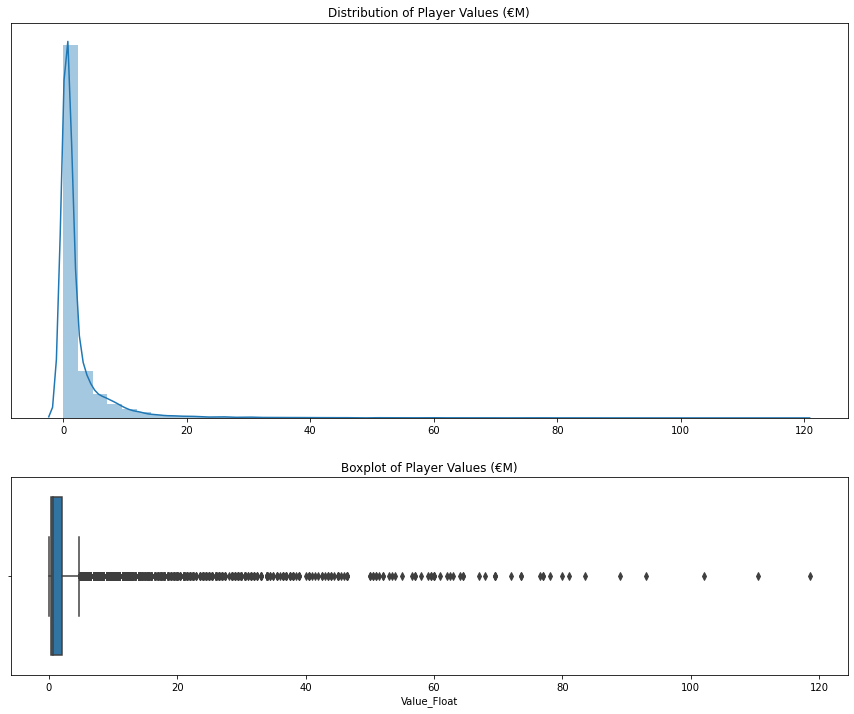

,Value_Float
count,17918.000000
mean,2.448629
std,5.631804
min,0.000000
25%,0.325000
50%,0.700000
75%,2.100000
max,118.500000


In [11]:
distribution_and_stats_plot(f_players[["Value_Float"]]/1000000,'Player Values (\N{euro sign}M)')

As you can see above, our players generally have low market value and for this reason, we can not see general the distribution of that. High prices players are almost not seeing on the chart. For that, we can use a logarithmic distribution chart, which shows us more clearly.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


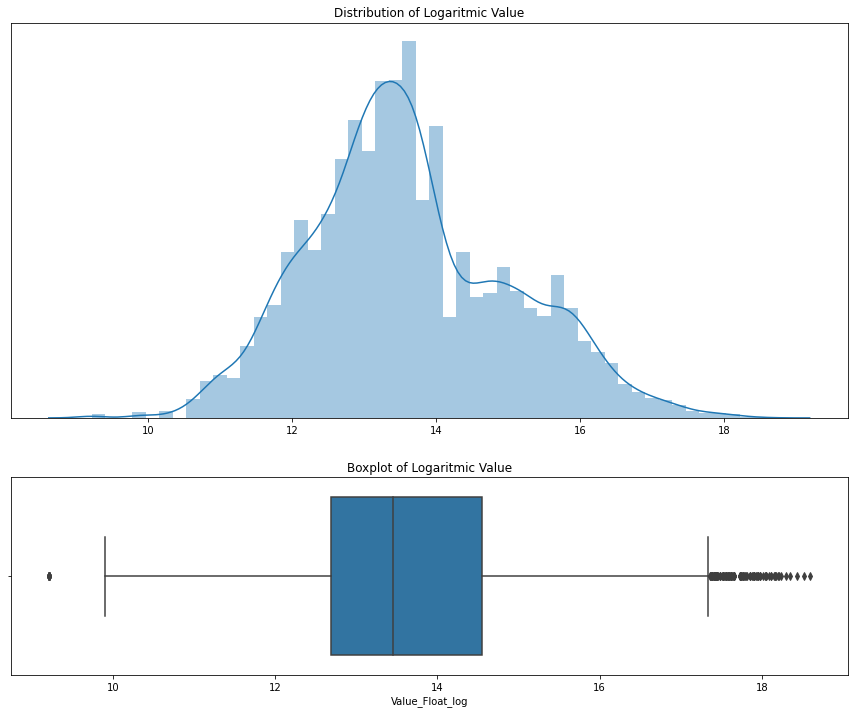

,Value_Float_log
count,17907.000000
mean,13.622829
std,1.407122
min,9.210440
25%,12.691584
50%,13.458837
75%,14.557448
max,18.590424


In [12]:
# In my data set there are 11 values equal 0 that is why, I added plus 1 for every values for converting log 
# After that I reaileze that 11 players old person and low overall rating. They do not any good affect on model.
# For this reason I deleted them and now my graphs is better than befor more clear and understandable.
#
#Convert to log

f_players["Value_Float_log"] = np.log(f_players["Value_Float"]+1)

#delete value_log=0 
f_players =f_players[f_players["Value_Float_log"] !=0]

distribution_and_stats_plot(f_players[["Value_Float_log"]],'Logaritmic Value')

### Step 1.2 Age

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


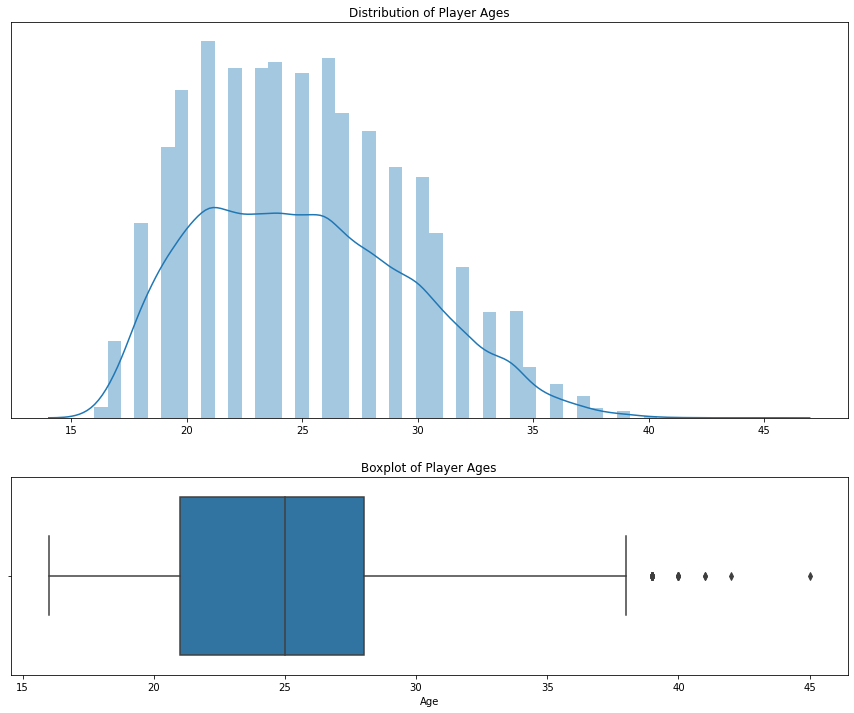

,Age
count,17907.000000
mean,25.095605
std,4.660388
min,16.000000
25%,21.000000
50%,25.000000
75%,28.000000
max,45.000000


In [13]:
distribution_and_stats_plot(f_players[["Age"]],'Player Ages')

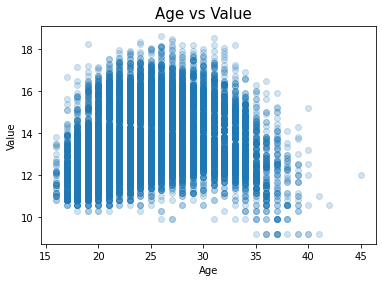

Pearson correlation = 0.07845203553213996


In [14]:
from scipy.stats import pearsonr

plt.scatter(x=f_players["Age"],y=f_players["Value_Float_log"],alpha=0.2)
plt.suptitle("Age vs Value",fontsize=15,y=0.95)
plt.xlabel("Age")
plt.ylabel("Value")
plt.show()

print(f"Pearson correlation = {pearsonr(f_players['Value_Float'],f_players['Age'])[0]}")

There seems to be a slight positive correlation between age and value (0.18) which suggests experience increases valuations, however, this is only up to a point. When the player age is approximately >35 then the values tend to decline. This makes sense as older players have fewer years left in their career so have less long term value for the club.

### Step 1.3 Player Position

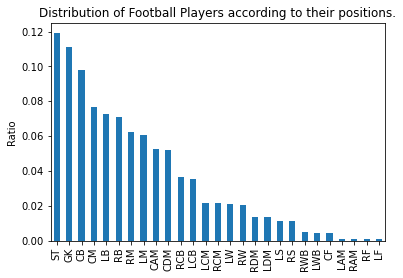

Number of positions= 27


In [15]:
f_players['Position'].value_counts(normalize= True).plot(kind='bar')
plt.title("Distribution of Football Players according to their positions.")
plt.ylabel("Ratio")
plt.show()

print(f"Number of positions= {len(f_players['Position'].unique())}")

As you can see from the above graphic, the most common positions are ST and GK. 

We have 27 unique positions. It's too much for analysis that's why we can classify these as, Attacker, midfielder, defender and goalkeeper. For that, I will create a new function.

In [16]:
def classify_position(position):
    """This function help to you for classification football player position."""
    
    Position_dict= { 'Attack' : ['ST','LS','RS','CF','RF','LF'],
                    'Midfield': ['CM','RM','LM','CAM','CDM','LCM','RCM','LW',
                                 'RW','RDM','LDM','LAM','RAM'],
                     'Defence': ['CB','LB','RB','RCB','LCB','RWB','LWB'],
                   'GoalKeeper':['GK']}
    
    for group , position_list in Position_dict.items():
        
        if position in position_list:
            return group
    
    return np.nan

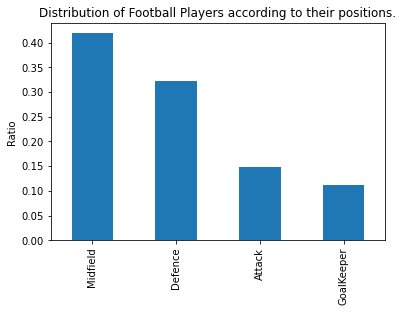

In [17]:
f_players['Position_classify'] = f_players['Position'].apply(classify_position)
f_players['Position_classify'].value_counts(normalize= True).plot(kind='bar')
plt.title("Distribution of Football Players according to their positions.")
plt.ylabel("Ratio")
plt.show()

##This chart shows a clearer distribution of players' positions.

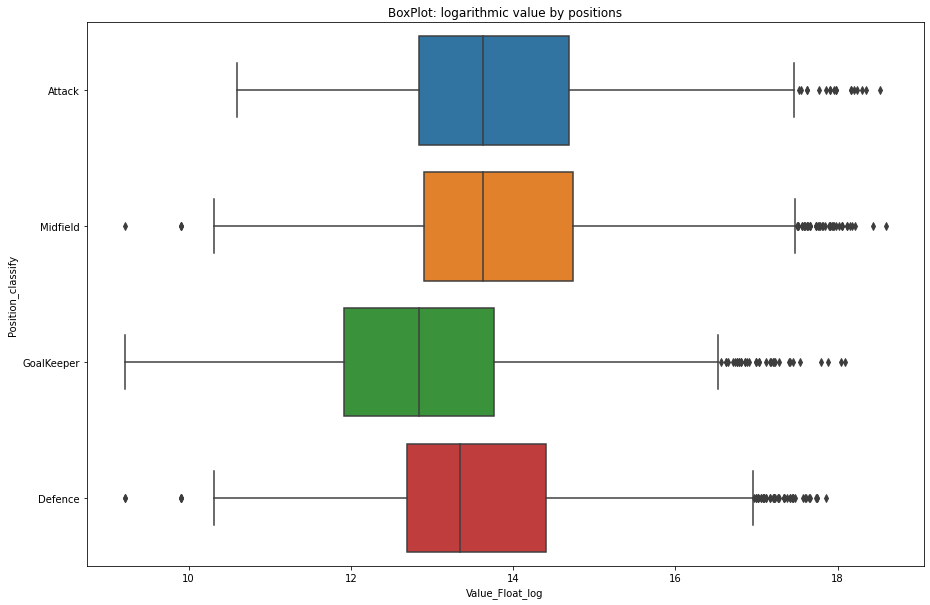

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Value_Float_log",y="Position_classify",data=f_players)
plt.title("BoxPlot: logarithmic value by positions")
plt.show()

### Step 1.4 Player Overall Rating

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


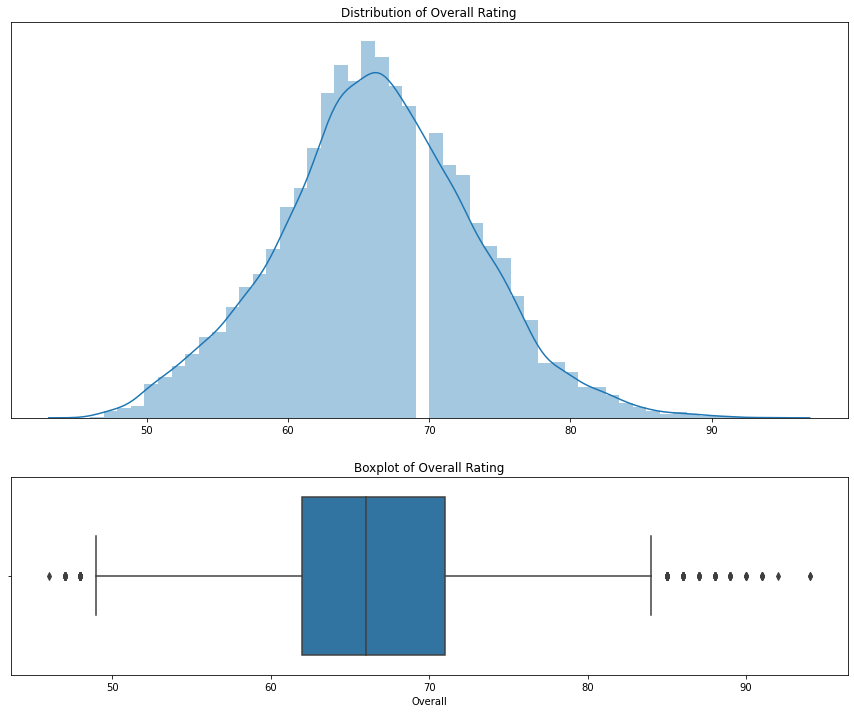

,Overall
count,17907.000000
mean,66.239571
std,6.926818
min,46.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,94.000000


In [19]:
distribution_and_stats_plot(f_players[["Overall"]],'Overall Rating')

Overal rating is normally distributed with a average of 66, minimum 46 and maximum 94.

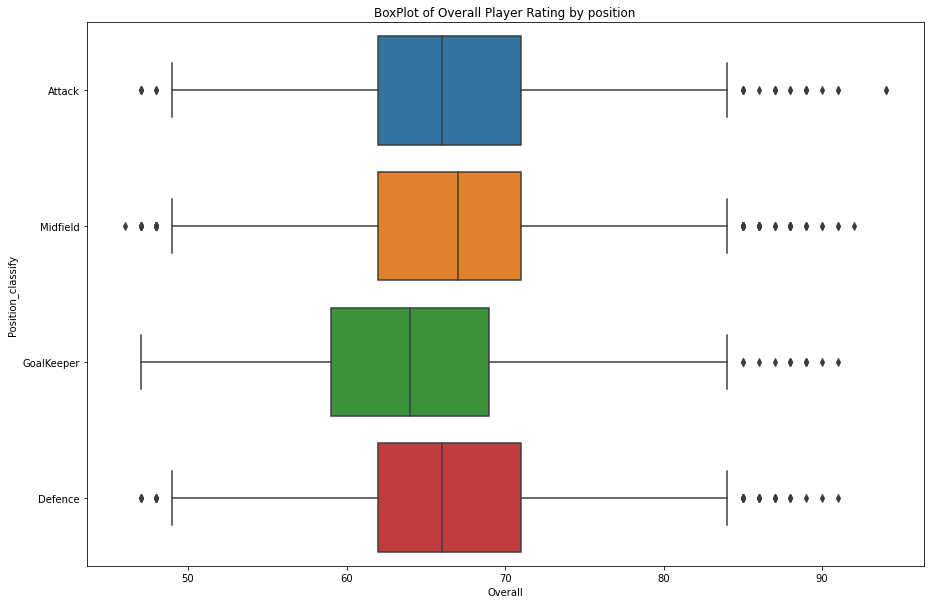

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Overall",y="Position_classify",data=f_players)
plt.title("BoxPlot of Overall Player Rating by position")
plt.show()

Except for Goalkeepers, other position more or less has the same overall rating. This interesting because as we see before on the logarithmic value by positions chart attackers and midfields market value higher than the others

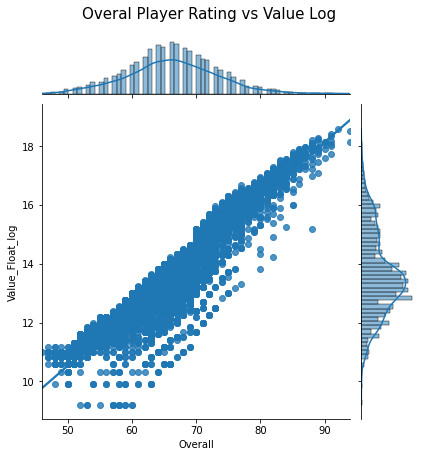

Pearson correlation = 0.9384379114329584
R2= 0.8806657136146531


In [21]:
sns.jointplot(x='Overall',y="Value_Float_log",data=f_players,kind='reg')
plt.suptitle("Overal Player Rating vs Value Log", fontsize=15,y=1.05)
plt.show()

print(f"Pearson correlation = {pearsonr(f_players['Value_Float_log'],f_players['Overall'])[0]}")
print(f"R2= {pearsonr(f_players['Value_Float_log'],f_players['Overall'])[0]**2}")

Overall rating is highly correlated with log value with an R2 of 0.89 and is likely to be the most predictive feature.

### Step 1.5 Player Potential

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


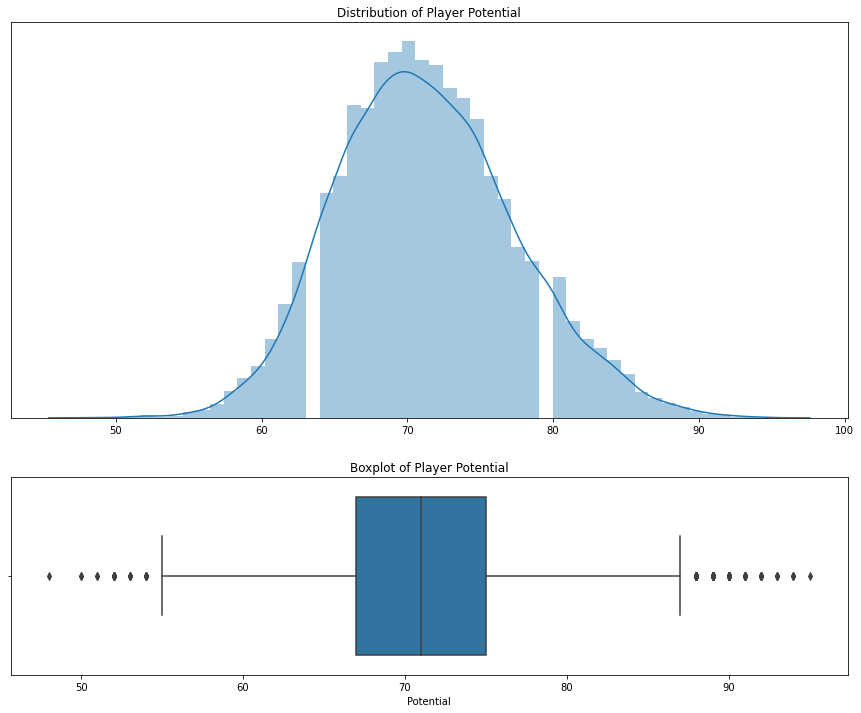

,Potential
count,17907.000000
mean,71.335232
std,6.137251
min,48.000000
25%,67.000000
50%,71.000000
75%,75.000000
max,95.000000


In [22]:
distribution_and_stats_plot(f_players[["Potential"]],'Player Potential')

The chart is more or less normally distributed and with a mean of 71.32.

Also, we can examine in detail the player potential according to their positions.

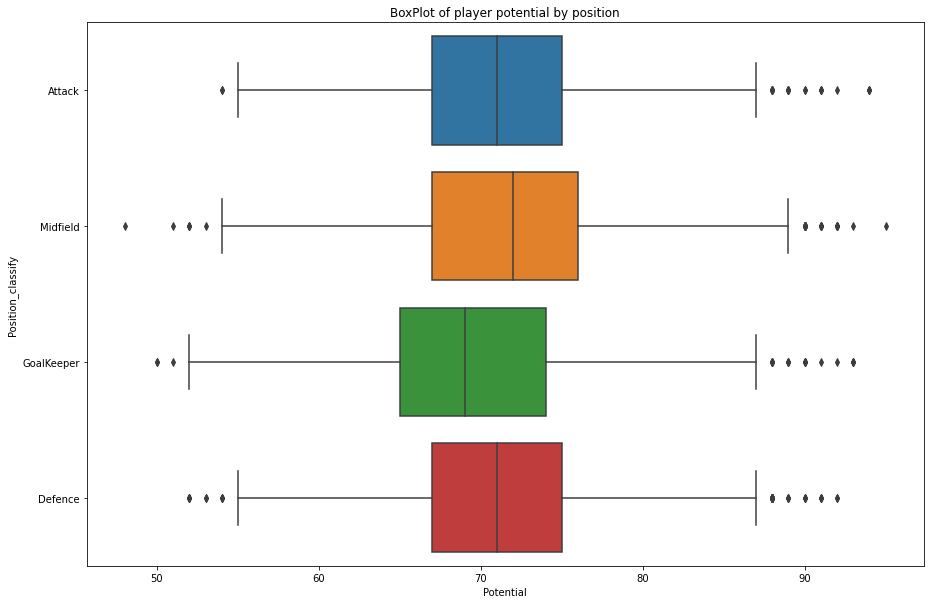

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Potential",y="Position_classify",data=f_players)
plt.title("BoxPlot of player potential by position")
plt.show()

The potential of the player does not seem much different for each position. Next step, we will look the relationship between player potential and player values. 

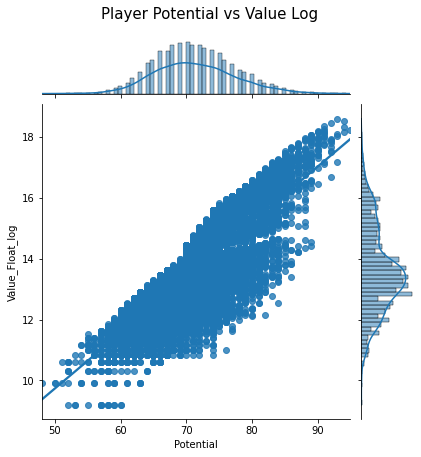

In [24]:
sns.jointplot(x='Potential',y="Value_Float_log",data=f_players,kind='reg')
plt.suptitle("Player Potential vs Value Log", fontsize=15,y=1.05)
plt.show()

The graphic turned out as expected. As you can see above, if a player has high potential it also has high market values. They are correlated.

This situation also expected between overall rating and potential. These are correlated. I will show them in the next step.

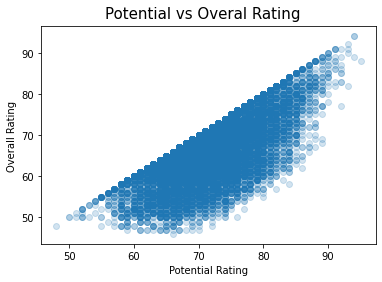

Pearson correlation = 0.6604089398648244


In [25]:
plt.scatter(x=f_players["Potential"],y=f_players["Overall"],alpha=0.2)
plt.suptitle("Potential vs Overal Rating",fontsize=15,y=0.95)
plt.xlabel("Potential Rating")
plt.ylabel("Overall Rating")
plt.show()

print(f"Pearson correlation = {pearsonr(f_players['Potential'],f_players['Overall'])[0]}")

You can see in the above graphs, a potential rating is higher than the overall rating, which makes sense. But correlation is not enough the eliminate one feature, for this reason, I will keep both of them.

Next step, I will look difference between potential and overall rating. It can be a nice feature to show the effect of potential rating increase on market value.

#### Potential Growth vs Market Value
In this step, I will create a new feature as Potential Growth. For this new one, I will do this calculation. >> PotentialGrowth = Potential - Overall An I will just looking the how is the relationship between market values and potential growth.

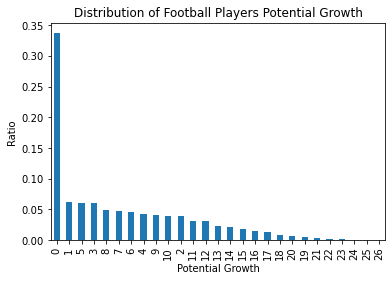

In [26]:
# Potential Growth
from matplotlib.pyplot import figure
f_players['PotentialGrowth'] = f_players['Potential']-f_players['Overall']
f_players['PotentialGrowth'].value_counts(normalize= True).plot(kind='bar',)
plt.title("Distribution of Football Players Potential Growth")
plt.xlabel("Potential Growth")
plt.ylabel("Ratio")
plt.show()


In our dataset, most of the player is already their maximum overall rating.

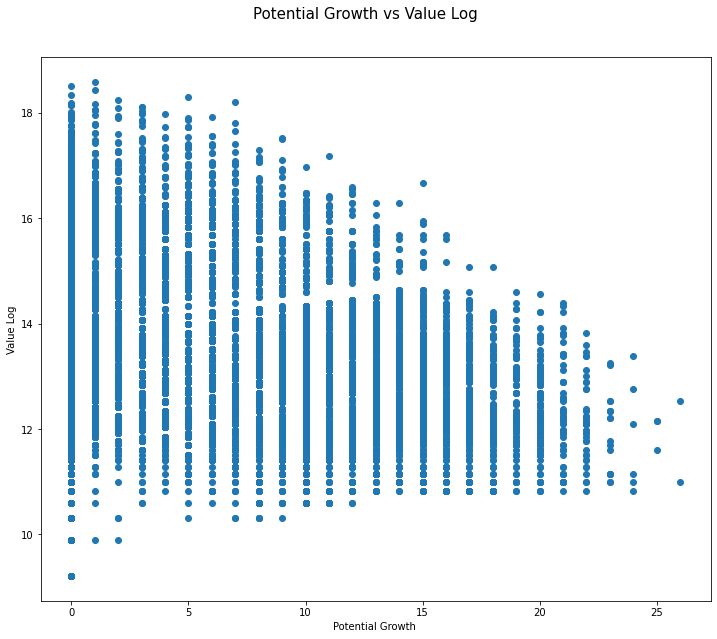

Pearson correlation = -0.1503113006956136


In [27]:
plt.figure(figsize=(12,10))
plt.scatter(x="PotentialGrowth",y="Value_Float_log",data=f_players)
plt.suptitle("Potential Growth vs Value Log",fontsize=15,y=0.95)
plt.xlabel("Potential Growth ")
plt.ylabel("Value Log")
plt.show()

print(f"Pearson correlation = {pearsonr(f_players['Value_Float'],f_players['PotentialGrowth'])[0]}")

As we expected, these two variables have an inverse relationship and the correlation value is proved this idea. If the maximum market values players potential growth is low. Because if you have low potential growth that's mean, you have a high overall rating for now(This is the general opinion, there may be some exceptions for that view.).

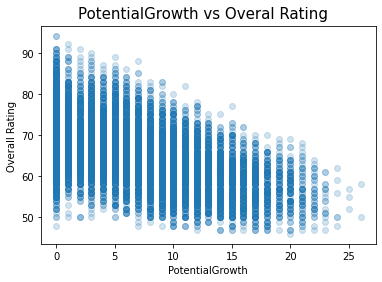

Pearson correlation = -0.5291261822409619


In [28]:
plt.scatter(x=f_players["PotentialGrowth"],y=f_players["Overall"],alpha=0.2)
plt.suptitle("PotentialGrowth vs Overal Rating",fontsize=15,y=0.95)
plt.xlabel("PotentialGrowth")
plt.ylabel("Overall Rating")
plt.show()

print(f"Pearson correlation = {pearsonr(f_players['PotentialGrowth'],f_players['Overall'])[0]}")

This graph shows better the relation between the overall rating and potential growth. If the potential growth increase, the overall rating is decreasing. Also, they have a negative correlation which makes sense.

### Step 1.6  Best Player for each Position

In [29]:
f_players.iloc[f_players.groupby(f_players['Position'])['Overall'].idxmax()].sort_values(by='Overall', 
                    ascending=False).reset_index()[['Position', 'Name','Age','Club', 'Nationality', 'Overall',
                                                    'Position_classify','Wage','Value']].style.background_gradient('Blues')

,Position,Name,Age,Club,Nationality,Overall,Position_classify,Wage,Value
0,ST,Cristiano Ronaldo,33,Juventus,Portugal,94,Attack,€405K,€77M
1,RF,L. Messi,31,FC Barcelona,Argentina,94,Attack,€565K,€110.5M
2,LW,Neymar Jr,26,Paris Saint-Germain,Brazil,92,Midfield,€290K,€118.5M
3,LF,E. Hazard,27,Chelsea,Belgium,91,Attack,€340K,€93M
4,RS,L. Suárez,31,FC Barcelona,Uruguay,91,Attack,€455K,€80M
5,RCM,K. De Bruyne,27,Manchester City,Belgium,91,Midfield,€355K,€102M
6,GK,De Gea,27,Manchester United,Spain,91,GoalKeeper,€260K,€72M
7,RCB,Sergio Ramos,32,Real Madrid,Spain,91,Defence,€380K,€51M
8,CB,D. Godín,32,Atlético Madrid,Uruguay,90,Defence,€125K,€44M
9,LCM,T. Kroos,28,Real Madrid,Germany,90,Midfield,€355K,€76.5M


### Step 1.7. Club Teams Overall

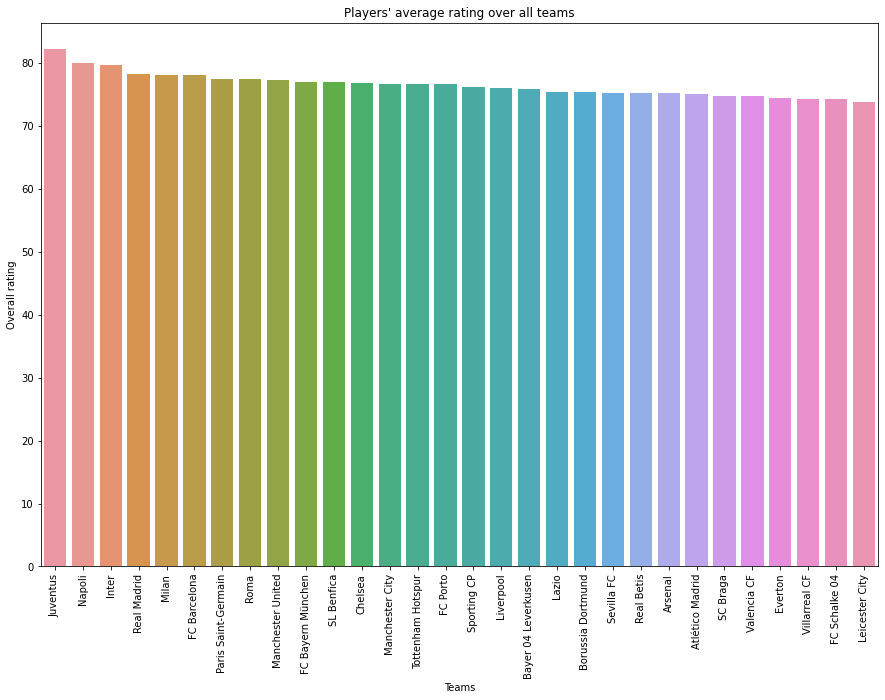

In [30]:
team_ret = f_players[['Club','Overall']].groupby('Club').mean().sort_values(by='Overall', ascending=False).head(30)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=team_ret.index, y=team_ret.Overall)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Overall rating')
plt.title('Players\' average rating over all teams')
plt.show()

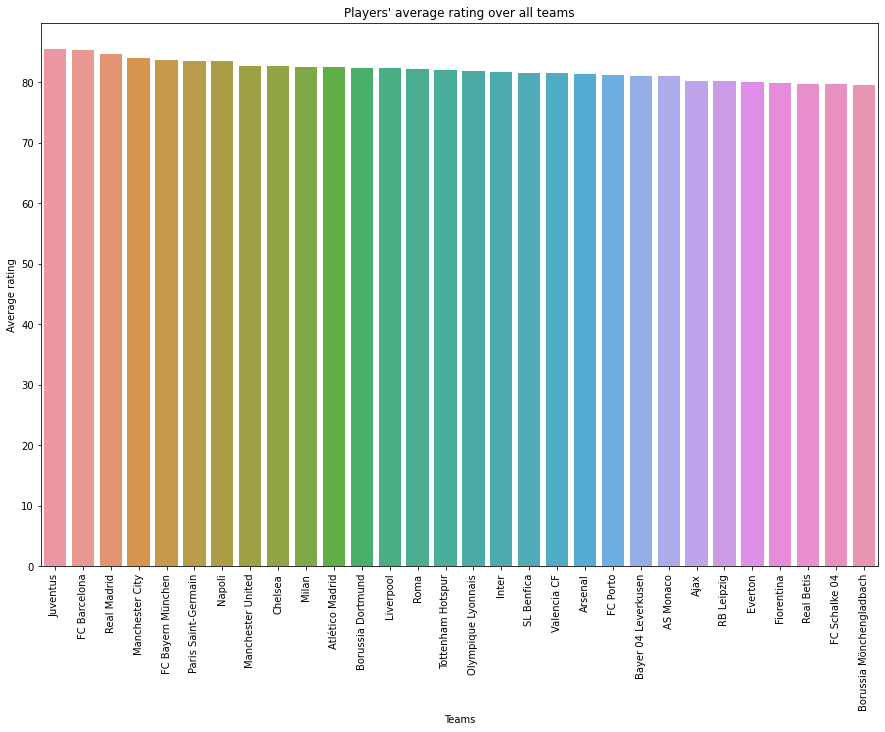

In [31]:
team_ret = f_players[['Club','Potential']].groupby('Club').mean().sort_values(by='Potential', ascending=False).head(30)
#country = df_nba[['country','full_name']].groupby('country').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=team_ret.index, y=team_ret.Potential)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Average rating')
plt.title('Players\' average rating over all teams')
plt.show()

### Step 1.9 Nationality

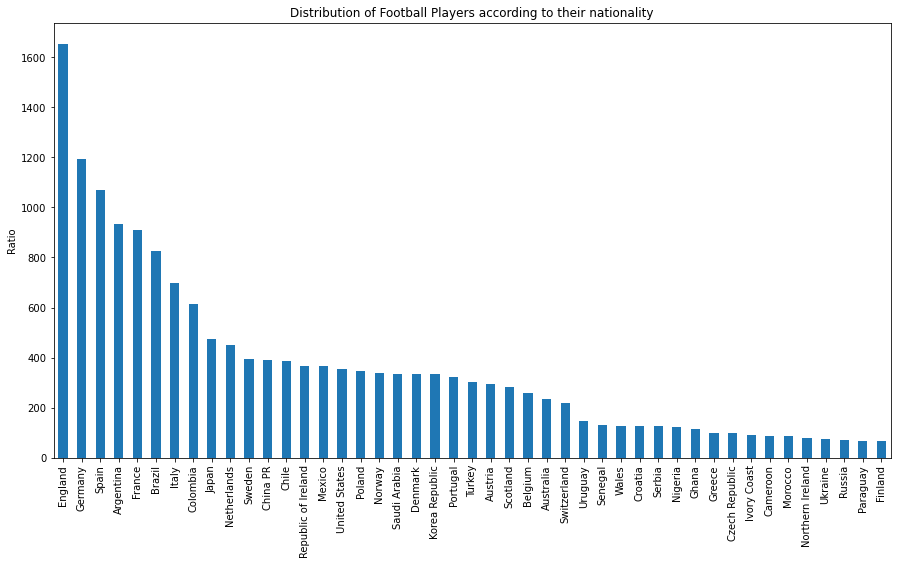

Number of countries= 43


In [32]:
nation = f_players['Nationality'].value_counts().head(45)
from matplotlib.pyplot import figure
figure(figsize=(15,8))
nation.plot(kind='bar')
plt.title("Distribution of Football Players according to their nationality")
plt.ylabel("Ratio")
plt.show()
print(f"Number of countries= {len(nation.unique())}")

In [33]:
def classify_position(nation):
    """This function help to you for classification football player nation."""
    
    Nation_dictionary= { 'Europe' : ['England','Germany','Spain','France','Italy','Netherlands','Sweden','Republic of Ireland',
                                       'Poland','Norway','Denmark','Portugal','Turkey','Austria','Scotland','Belgium',
                                       'Switzerland','Wales','Serbia','Croatia','Greece','Czech Republic','Northern Ireland',
                                       'Ukraine','Russia','Finland'],
                    'America': ['Argentina','Brazil','Colombia','Chile','Mexico','United States','Uruguay','Paraguay'],
                     'Asia': ['Japan','China PR','Saudi Arabia','Korea Republic'],
                   'Australia':['Australia'],
                        'Africa':['Senegal','Nigeria','Ghana','Ivory Coast','Cameroon','Morocco']}
    
    for group , nation_list in Nation_dictionary.items():
        
        if nation in nation_list:
            return group
    
    return np.nan

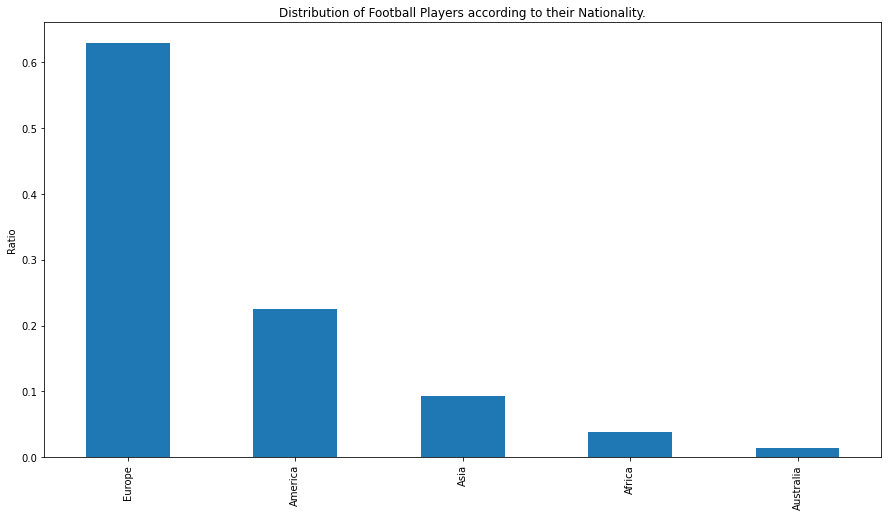

In [34]:
f_players['Nation_classify'] = f_players['Nationality'].apply(classify_position)
figure(figsize=(15,8))
f_players['Nation_classify'].value_counts(normalize= True).plot(kind='bar')
plt.title("Distribution of Football Players according to their Nationality.")
plt.ylabel("Ratio")
plt.show()

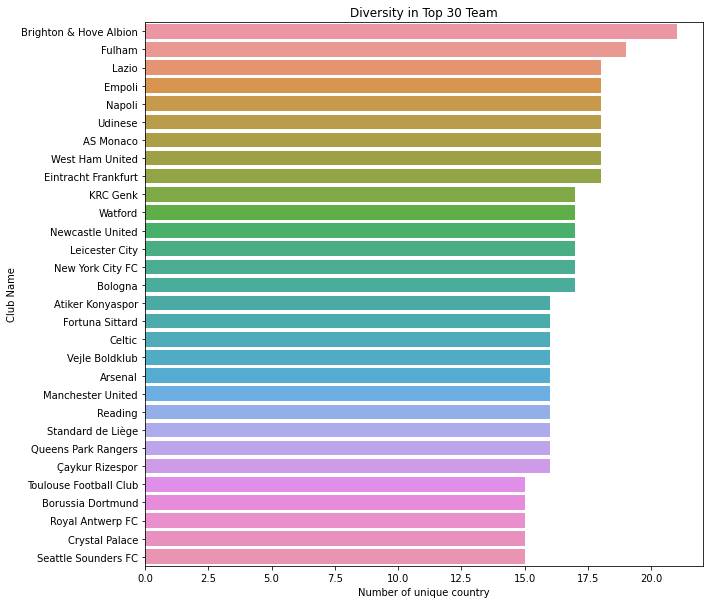

Average of players from different nationalities in teams:7.861751152073733
Number of unique club teams: 651


In [35]:
### Diversity in Club Teams
country_club = f_players.groupby(f_players['Club'])['Nationality'].nunique().sort_values(ascending = False)
country_nunique = country_club.head(30)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=country_nunique.values, y=country_nunique.index)
plt.xticks()
plt.xlabel('Number of unique country')
plt.ylabel('Club Name')
plt.title('Diversity in Top 30 Team')
plt.show()
print("Average of players from different nationalities in teams:{}".format(np.mean(country_club)))
print("Number of unique club teams: {}".format(len(f_players['Club'].unique())))


Text(0.5, 1.0, 'Average of players from different nationalities in teams')

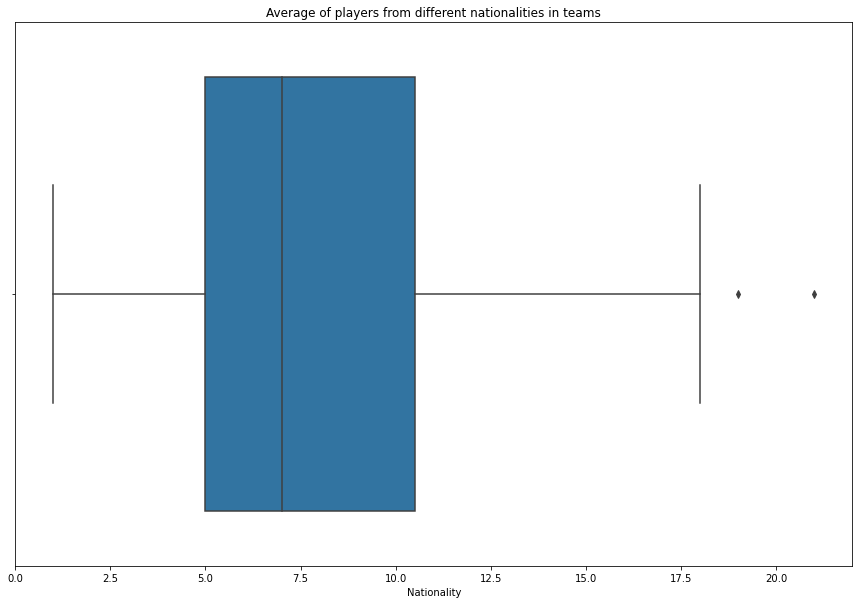

In [36]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=country_club)
plt.title("Average of players from different nationalities in teams")



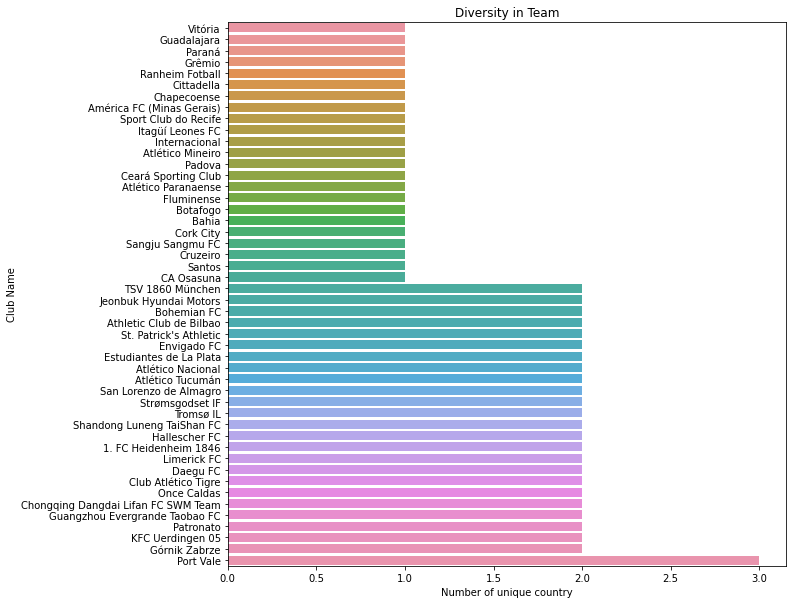

Number of unique club teams: 651


In [37]:
country_nunique = f_players.groupby(f_players['Club'])['Nationality'].nunique().sort_values(ascending = True).head(48)
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=country_nunique.values, y=country_nunique.index)
plt.xticks()
plt.xlabel('Number of unique country')
plt.ylabel('Club Name')
plt.title('Diversity in Team')
plt.show()
print("Number of unique club teams: {}".format(len(f_players['Club'].unique())))

### Nation based on rating
Sunuma koymayacağım

Text(0.5, 1.0, 'Country Based on Rating')

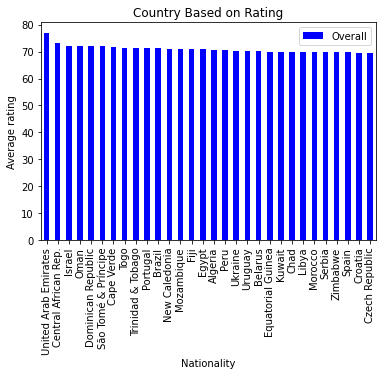

In [38]:
#plt.figure(figsize=(28,18))
Nation_overall = f_players[['Nationality','Overall']].groupby('Nationality').mean().sort_values(by='Overall', ascending=False)
Nation_overall.head(30).plot(kind='bar', color='blue')
plt.xlabel('Nationality')
plt.ylabel('Average rating')
plt.title('Country Based on Rating')

### Step 1.10 Wage 
The ratio of total wage for all the players to the potential of each club and which clubs offer the least wage to players?

In [39]:
club_player = f_players.groupby('Club').sum()
# Number of clubs and average number of players in each club
print('Number of clubs is {}'.format(club_player.shape[0]))
print('Average number players in each club is {}'.format(round(club_player['Age'].mean()/f_players['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'.
      format(round(club_player['Wage_Float'].sum()/(club_player['Potential'].sum()*1000), 2)))
##Wage ve Value çevirirken çarptığım için 1000'e böldük

Number of clubs is 651
Average number players in each club is 27.51
Total Average wage(K) potential ratio is 0.14


In [40]:
club_player['Wage/Potential'] = club_player['Wage_Float'] / club_player['Potential']
club_player['Player Number'] = club_player['Age']
club_player['Player Average Age'] = club_player['Age'] / club_player['Player Number']

Text(0.5, 1.0, 'Top 30 clubs spending wage(K) on players')

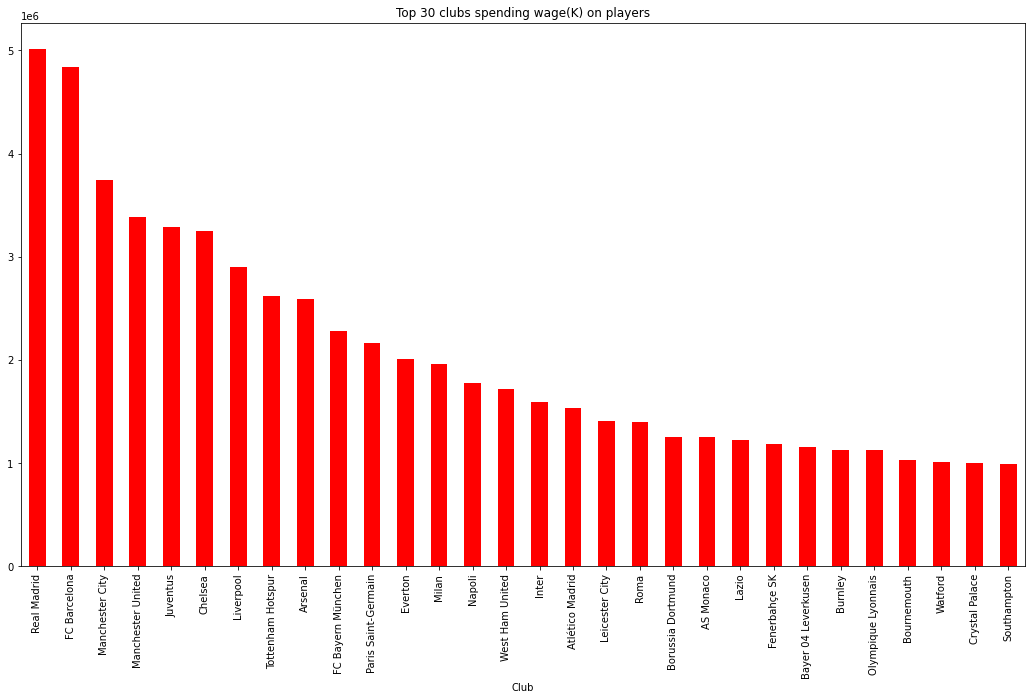

In [41]:
plt.figure(figsize=(18,10))
club_player.sort_values('Wage_Float', ascending=False, inplace=True)
club_player['Wage_Float'].head(30).plot(kind='bar', color='Red')
plt.title('Top 30 clubs spending wage(K) on players')

Text(0.5, 1.0, '30 teams that spend less wages (K) on players')

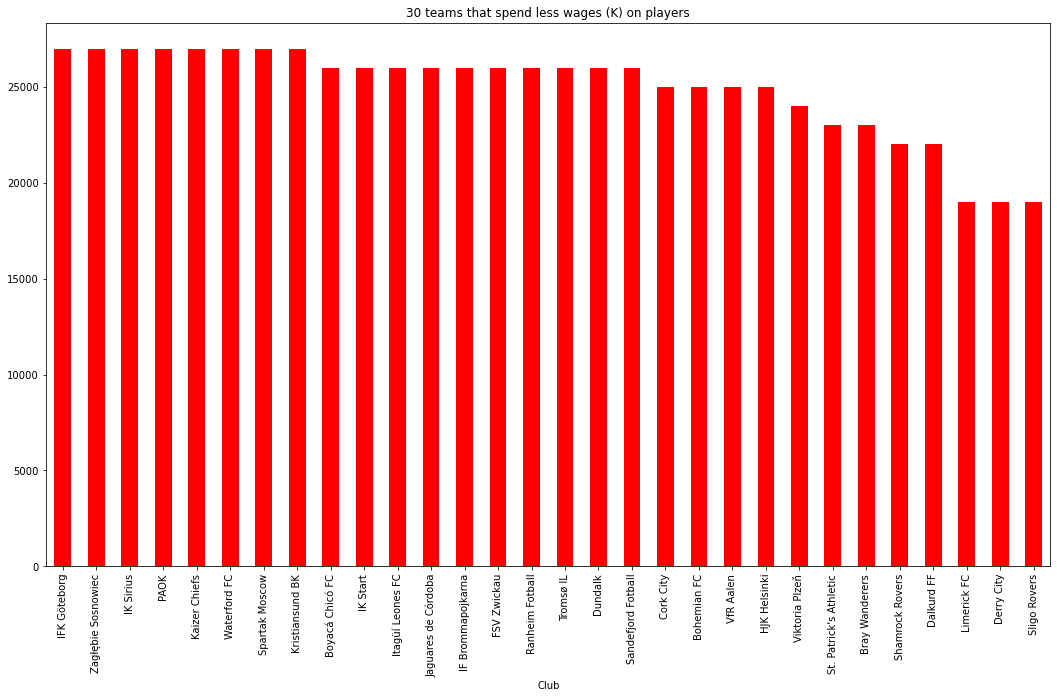

In [42]:
plt.figure(figsize=(18,10))
club_player.sort_values('Wage_Float', ascending=False, inplace=True)
club_player['Wage_Float'].tail(30).plot(kind='bar', color='Red')
plt.title('30 teams that spend less wages (K) on players')

Text(0.5, 1.0, 'Top 30 clubs spending wage on players potential')

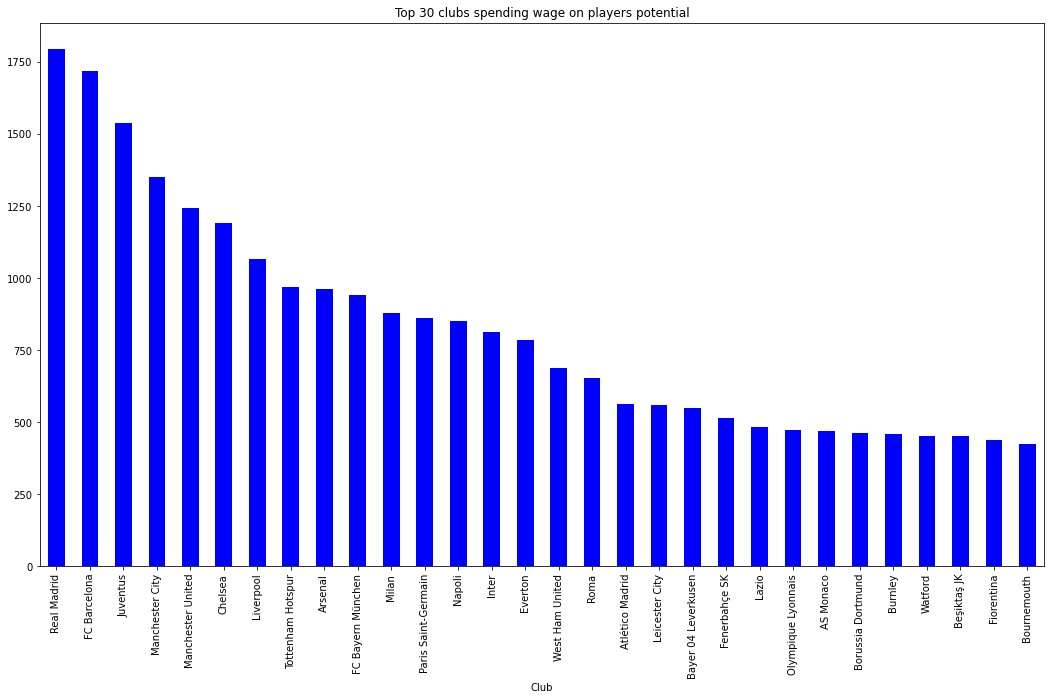

In [43]:
plt.figure(figsize=(18,10))
club_player.sort_values('Wage/Potential', ascending=False, inplace=True)
club_player['Wage/Potential'].head(30).plot(kind='bar', color='Blue')
plt.title('Top 30 clubs spending wage on players potential')

Text(0.5, 1.0, 'Top 30 Economize clubs')

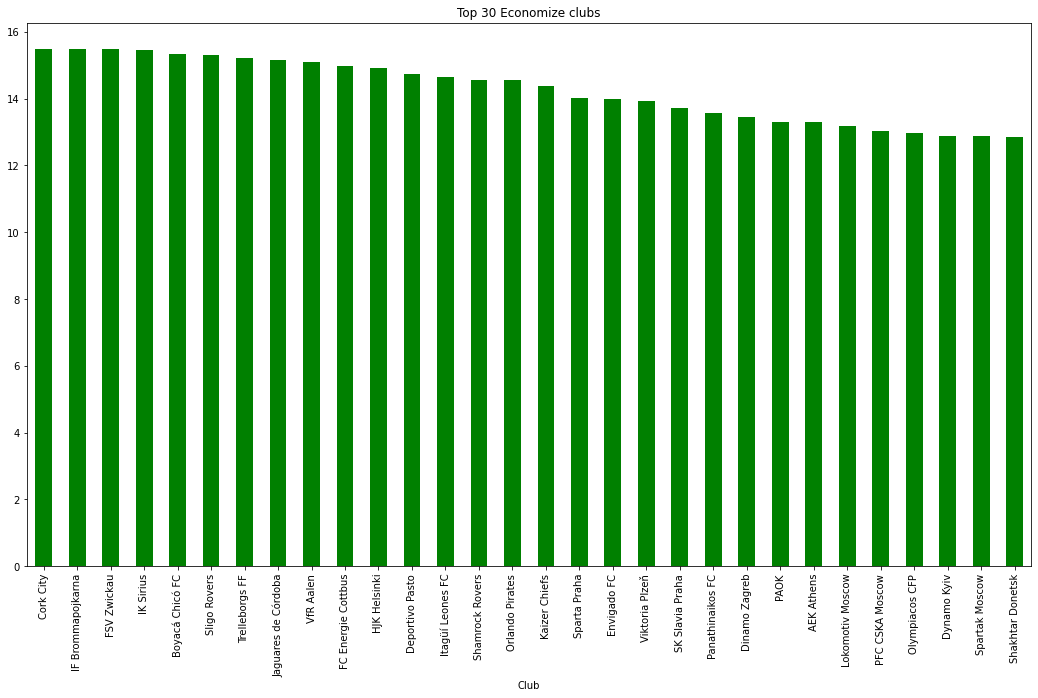

In [44]:
plt.figure(figsize=(18,10))
club_player['Wage/Potential'].tail(30).plot(kind='bar', color='Green')
plt.title('Top 30 Economize clubs')

### Step 1.10 Preferred FOOT VS Market Value

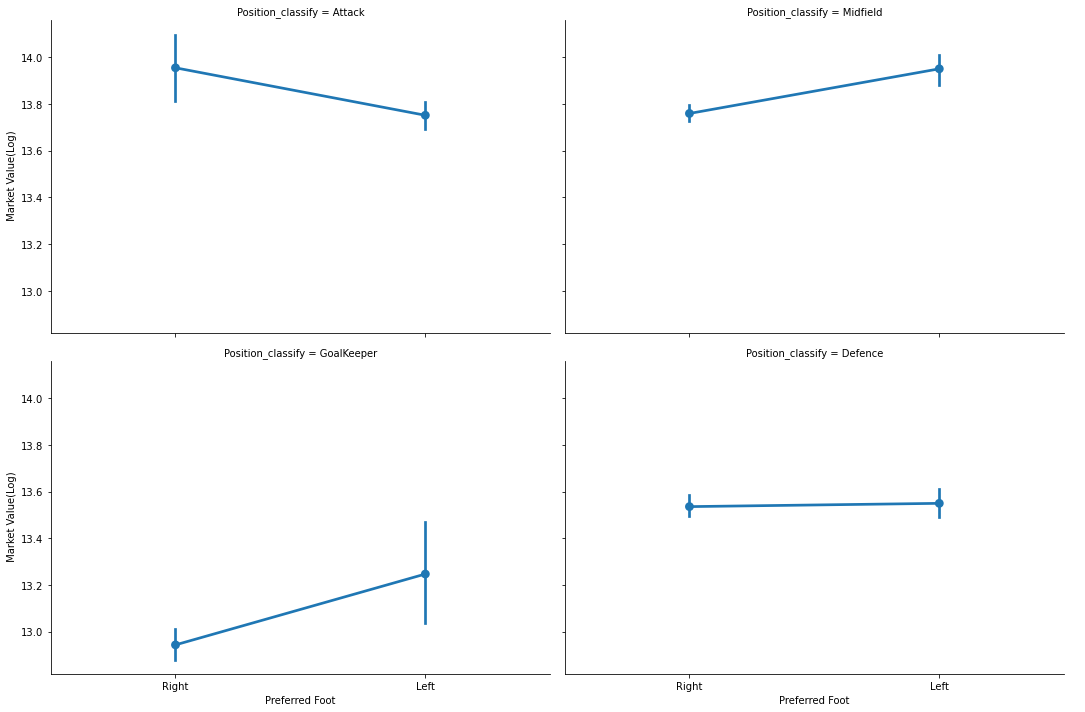

In [45]:
fg = sns.FacetGrid(f_players,col='Position_classify',height=5,aspect=1.5,col_wrap=2)
fg.map(sns.pointplot,'Preferred Foot','Value_Float_log',palette= None, order= None, hue_order = None)
fg.add_legend()
fg.set_axis_labels("Preferred Foot", " Market Value(Log)")


<Figure size 1080x576 with 0 Axes>

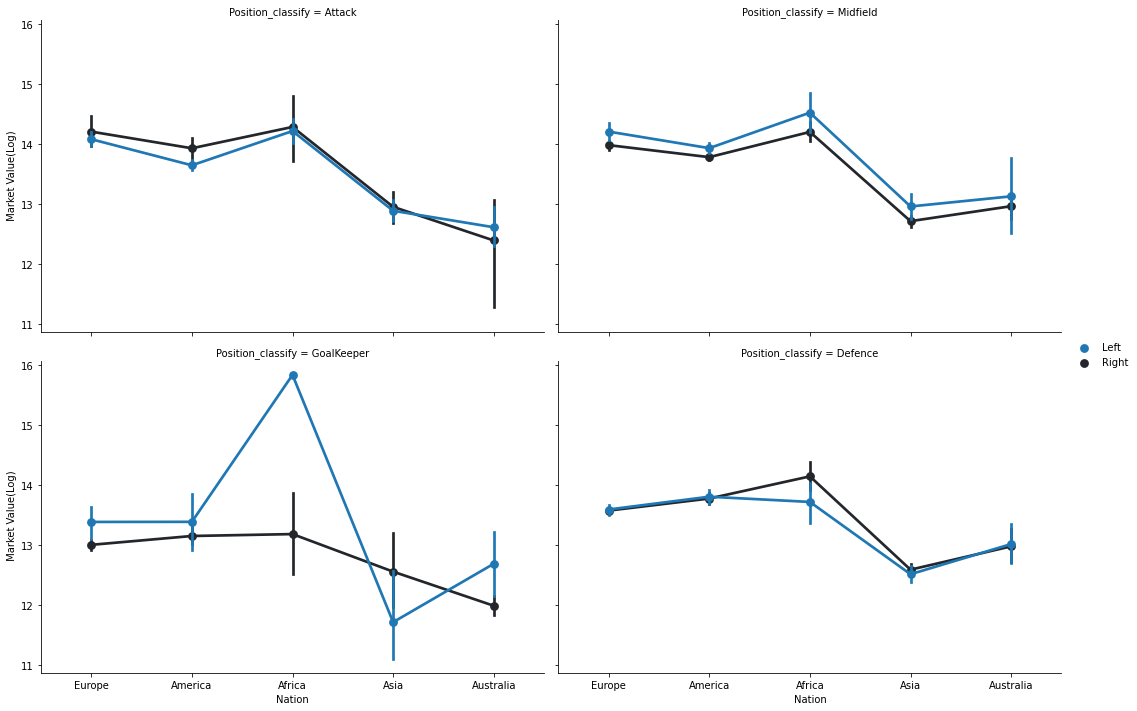

In [46]:
figure(figsize=(15,8))
fg = sns.FacetGrid(f_players,col='Position_classify',height=5,aspect=1.5,col_wrap=2)
fg.map(sns.pointplot,'Nation_classify','Value_Float_log','Preferred Foot',palette= None, order= None, hue_order = None)
fg.add_legend()
fg.set_axis_labels("Nation", " Market Value(Log)")

### Step 1.11 Player attribute features

In [47]:
ATTRIBUTES =['Crossing', 'Finishing', 'HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
             'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility','Reactions', 'Balance', 'ShotPower',
             'Jumping','Stamina', 'Strength','LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties', 
             'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 
             'GKReflexes',]

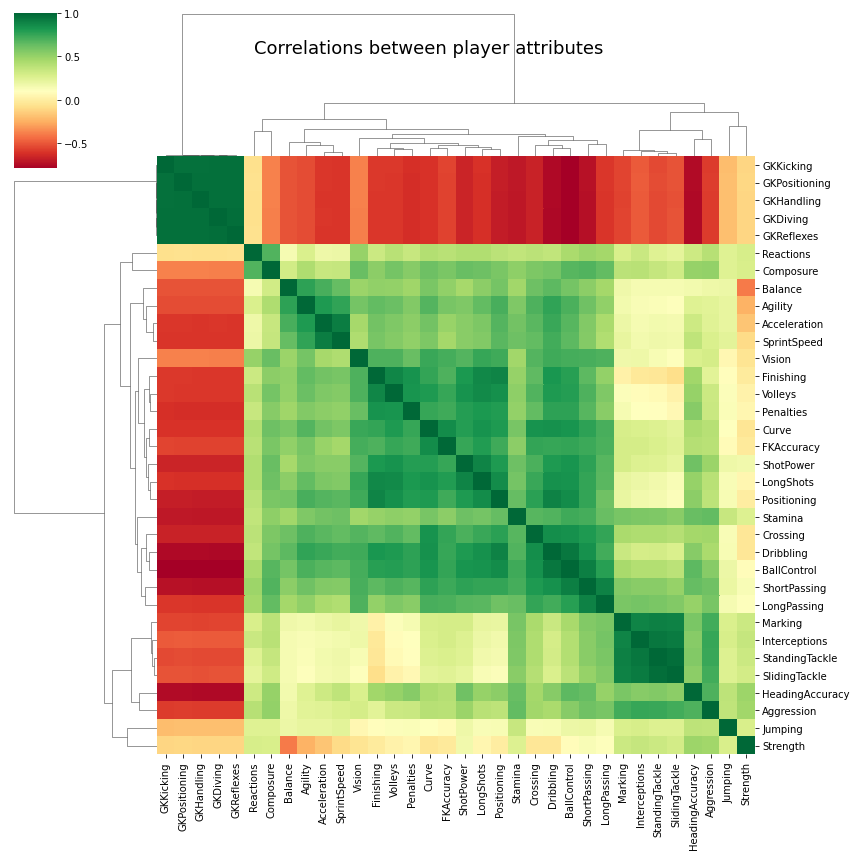

In [48]:
sns.clustermap(f_players[ATTRIBUTES].corr(),cmap='RdYlGn',figsize=(12,12))
plt.suptitle("Correlations between player attributes",fontsize=18,y=0.95)
plt.show()

There are a number of highly correlated features. Most notably, the goal keeping attributes (GK kicking, GK positioning, GK handling, GK diving and GK reflexes) are very correlated with each other and negatively correlated with the outfield attributes. Outfield attributes are generally all correlated with each other. Defending attributes (Marking, interceptions, standing tackle, sliding tackle etc) are very correlated with each other, however, the attacking attributes are not as strongly correlated. This shows that generally, goal keepers and defenders have a set of 'standard' skills whereas the attacking players have more specific skills sets (e.g. particularly good at volleying or crossing but not necessarily both.

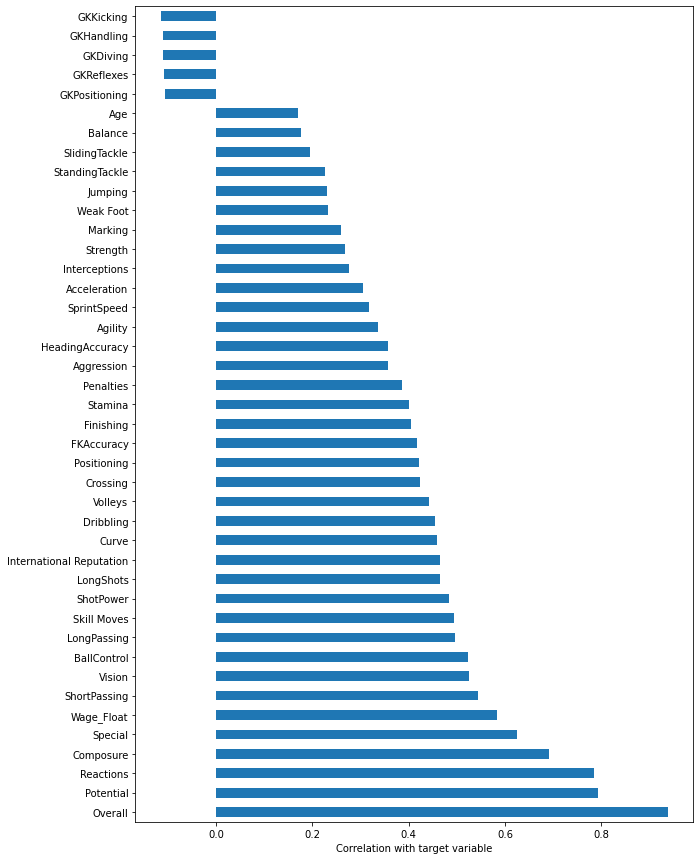

In [49]:
f_players.drop(['PotentialGrowth','Jersey Number','ID','Unnamed: 0','Value_Float'] ,axis =1 , inplace = True)
from IPython.core.display import display, HTML
display(HTML("<b>Feature Correlations to the target variable, log(Value_Float)<b>"))
f_players.corr()["Value_Float_log"].sort_values(ascending=False).iloc[1:].plot(kind='barh',figsize=(10,15))
plt.xlabel("Correlation with target variable")
plt.show()